# 1. Backpropagation for bias vectors (1.5 points)

In class, we discussed a multilayer perceptron (neural network) whose layers were all "dense", i.e. the output $a^m \in \mathbb{R}^{N^m}$ of the $m$th layer is computed as
\begin{align*}
z^m &= W^m a^{m - 1} + b^m \\
a^m &= \sigma^m(z^m)
\end{align*}
where $W^m \in \mathbb{R}^{N^m \times N^{m - 1}}$ is the weight matrix, $b^m \in \mathbb{R}^{N^m}$ is the bias vector, and $\sigma^m$ is the nonlinearity. We showed that
$$\frac{\partial C}{\partial W^m} = \frac{\partial C}{\partial z^m} a^{m - 1 \top}$$
Show that
$$\frac{\partial C}{\partial b^m} = \frac{\partial C}{\partial z^m}$$
Hint: The derivation is almost the same as for $W$.

Here is an image of my proof:

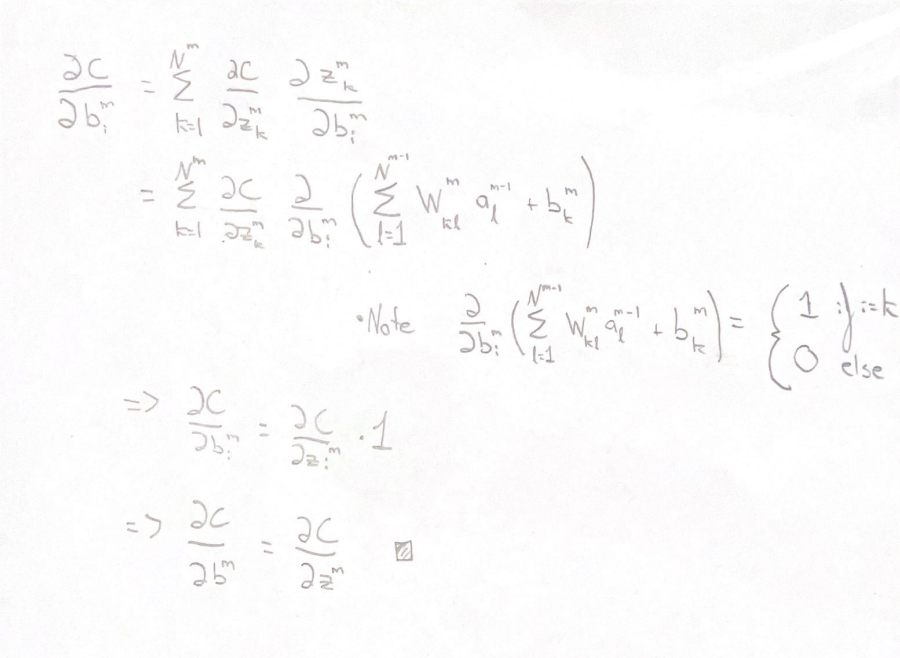

# 2. MLP from scratch (3.5 points)

Using numpy only, implement backward pass or a sigmoid MLP. Specifically, you will need to implement this functionality in the `train` function in the `SigmoidMLP` class below. You should write numpy code to populate the two lists `weight_gradients` and `bias_gradient`, where each entry in each list corresponds to the gradient for a weight matrix or bias vector for each layer. Then, when you run the code cell at the bottom of this notebook, the trained MLP should output (approximately) 0, 1, 1, 0, having learned the [XOR function](https://en.wikipedia.org/wiki/Exclusive_or). Please us a binary cross-entropy loss, i.e.
$$C(a^L, y) = (y - 1)\log(1 - a^L) - y\log(a^L)$$

*Note 1*: All layers in your model, including the last layer, will use the sigmoid nonlinearity. Remember that
$$
\frac{\partial}{\partial x}\mathrm{sigmoid}(x) = \mathrm{sigmoid}(x)(1 - \mathrm{sigmoid}(x))$$

*Note 2*: As we mentioned in class,
$$
\frac{\partial C}{\partial z^L} = a^L - y
$$

In [ ]:
import numpy as np

class Layer:
    def __init__(self, inputs, outputs):
        # Initialize weight matrix and bias vector
        # Getting the initialization right can be tricky, but for this problem
        # simply drawing from a standard normal distribution should work.
        self.weights = np.random.randn(outputs, inputs)
        self.biases = np.random.randn(outputs, 1)
    def __call__(self, X):
        # Compute \sigmoid(Wx + b)
        return 1/(1 + np.exp(-(self.weights.dot(X) + self.biases)))

class SigmoidMLP:

    def __init__(self, layer_widths):
        self.layers = []
        for inputs, outputs in zip(layer_widths[:-1], layer_widths[1:]):
            self.layers.append(Layer(inputs, outputs))

    def train(self, inputs, targets, learning_rate):
        # Forward pass - compute each layer's output and store it for later use
        layer_outputs = [inputs]
        for layer in self.layers:
            layer_outputs.append(layer(layer_outputs[-1]))

        # Implement backward pass to populate weight_gradients and bias_gradients
        # lists here
        weight_gradients = []
        bias_gradients = []
        # ... (your code here) ...

        W1 = self.layers[0].weights
        W2 = self.layers[1].weights

        a0 = layer_outputs[0]
        a1 = layer_outputs[1]
        a2 = layer_outputs[2]


        lg2 = a2 - targets
        wg2 = lg2 @ a1.T
        bg2 = lg2.sum(axis=1,keepdims=True)

        lg1 = W2.T @ lg2 * (a1*(1-a1))
        wg1 = lg1 @ a0.T
        bg1 = lg1.sum(axis=1, keepdims=True)

        weight_gradients.append(wg1)
        weight_gradients.append(wg2)
        bias_gradients.append(bg1)
        bias_gradients.append(bg2)

        # Perform gradient descent by applying updates
        for weight_gradient, bias_gradient, layer in zip(weight_gradients, bias_gradients, self.layers):
            layer.weights -= weight_gradient*learning_rate
            layer.biases -= bias_gradient*learning_rate

    def __call__(self, inputs):
        a = inputs
        for layer in self.layers:
            a = layer(a)
        return a

def train_mlp(n_iterations, learning_rate):
    mlp = SigmoidMLP([2, 2, 1])
    inputs = np.array([[0, 1, 0, 1],
                       [0, 0, 1, 1]])
    targets = np.array([[0, 1, 1, 0]])
    for _ in range(int(n_iterations)):
        mlp.train(inputs, targets, learning_rate)
    return mlp

In [ ]:
# You may need to change the n_iterations and learning_rate values
# but these worked for me
mlp = train_mlp(1000, 1.)

# The following calls should result in (approximately) 0, 1, 1, 0
# If the outputs are somewhat close, your training has succeeded!
print(mlp(np.array([0, 0]).reshape(-1, 1)))
print(mlp(np.array([0, 1]).reshape(-1, 1)))
print(mlp(np.array([1, 0]).reshape(-1, 1)))
print(mlp(np.array([1, 1]).reshape(-1, 1)))

[[0.00619083]]
[[0.99543423]]
[[0.99543421]]
[[0.0064813]]


In [ ]:
a = np.array([[1,2],[3,4]])
b = np.array([1, 1])
a.T @ b

array([4, 6])